In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from modcom.ml import TextPreprocessor

In [6]:
df_cols = ["prev_idx", "parent_idx", "body", "removed"]

TEXT_COL = "body"
CLEAN_COL = "clean_body"
TOK_COL = "token_body"

In [7]:
df = pd.read_csv(
    "data/reddit_train.csv", names=df_cols, skiprows=1, encoding="ISO-8859-1"
)

In [8]:
df.head()

,prev_idx,parent_idx,body,removed
0,8756,8877,Always be wary of news articles that cite unpu...,0
1,7330,7432,The problem I have with this is that the artic...,0
2,15711,15944,"This is indicative of a typical power law, and...",0
3,1604,1625,This doesn't make sense. Chess obviously trans...,0
4,13327,13520,1. I dispute that gene engineering is burdenso...,0


In [9]:
df.drop(columns=df_cols[:2], inplace=True)

In [10]:
df.head()

,body,removed
0,Always be wary of news articles that cite unpu...,0
1,The problem I have with this is that the artic...,0
2,"This is indicative of a typical power law, and...",0
3,This doesn't make sense. Chess obviously trans...,0
4,1. I dispute that gene engineering is burdenso...,0


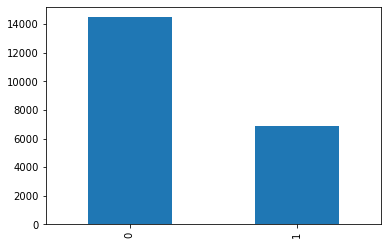

In [11]:
df["removed"].value_counts().plot.bar();

In [12]:
X = df["body"].values
y = df["removed"].values

trainX, testX, trainY, testY = train_test_split(
    X, y, stratify=y, test_size=0.1, shuffle=True
)

In [13]:
text_transformer = TextPreprocessor()

In [14]:
trainX_tokenized = text_transformer.clean_and_tokenize(trainX)

In [15]:
def placeholder(x):
    return x

In [16]:
tfidf_vec = TfidfVectorizer(
    min_df=10,
    max_df=0.5,
    sublinear_tf=True,
    preprocessor=placeholder,
    tokenizer=placeholder,
    token_pattern=None,
    ngram_range=(1, 2),
)

In [17]:
trainX_tfidf = tfidf_vec.fit_transform(trainX_tokenized)

In [18]:
clf = LogisticRegression(C=4, dual=True, solver="liblinear")

In [19]:
clf.fit(trainX_tfidf, trainY)

LogisticRegression(C=4, dual=True, solver='liblinear')

In [16]:
tmp = text_transformer.clean(testX)

In [23]:
trainX_tfidf[0].shape

(1, 6218)

In [17]:
test_tfidf = tfidf_vec.transform(tmp)

In [18]:
probs = clf.predict_proba(test_tfidf)

In [19]:
preds = probs.argmax(axis=1)

In [21]:
score = roc_auc_score(testY, preds)

In [22]:
score

0.6553525119597957

In [23]:
acc = accuracy_score(testY, preds)

In [24]:
acc

0.7300843486410497

In [49]:
import json

## Save Model

In [20]:
from pathlib import Path

import joblib

In [21]:
model_dir = Path("models")

model_dir.mkdir(exist_ok=True)

In [22]:
joblib.dump(clf, 'models/simple_logistic.ml')

['models/simple_logistic.ml']

In [33]:
joblib.dump(tfidf_vec, model_dir / 'vectorizer_normal.ml')

['models/vectorizer_normal.ml']

In [24]:
joblib.dump(tfidf_vec, model_dir / 'vectorizer.ml', compress=3)

['models/vectorizer.ml']

In [4]:
t = joblib.load('models/vectorizer.ml')

del t

# Jovian

In [36]:
import jovian

<IPython.core.display.Javascript object>

In [37]:
jovian.reset()

In [38]:
jovian.commit(
    filename="modcom-training.ipynb",
    outputs=["models/logistic_first_try_compressed.model"],
    message="Init",
)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/volf52/modcom-training


'https://jovian.ai/volf52/modcom-training'